In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns in our dataset.

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [6]:
df.drop(['_c39'],axis=1,inplace=True)

Lets drop policy no, as its a nominal feature.

In [7]:
df.drop(['policy_number'],axis=1,inplace=True)

Lets drop insured_hobbies as we consider thats not going to be valuable info to predict the claim fraud.

In [8]:
df.drop(['insured_hobbies'],axis=1,inplace=True)

In [9]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
df.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

There is no missing values in the dataset

## Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [12]:
categorical_columns=[]
continous_columns=[]
for col in df.columns:
    if df[col].dtype=='object':
        categorical_columns.append(col)
    else:
        continous_columns.append(col)

In [13]:
for col in categorical_columns:
    print(col)
    print("=================================")
    print(df[col].value_counts(),'\n')

policy_bind_date
28-04-1992    3
05-08-1992    3
01-01-2006    3
07-07-1996    2
30-08-1993    2
             ..
10-11-2005    1
28-12-2014    1
07-08-1991    1
06-12-1996    1
17-07-2012    1
Name: policy_bind_date, Length: 951, dtype: int64 

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
h

We have missing values in collision_type,property_damage,police_report_available with the value as '?'.

Lets drop incident_location as we already have incident_city and incident_state.

In [14]:
df.drop(['incident_location'],axis=1,inplace=True)

In [15]:
df['policy_date']=pd.to_datetime(df['policy_bind_date']).dt.day
df['policy_month']=pd.to_datetime(df['policy_bind_date']).dt.month
df['policy_year']=pd.to_datetime(df['policy_bind_date']).dt.year

In [16]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [17]:
df['incident_month']=pd.to_datetime(df['incident_date']).dt.month
df['incident_year']=pd.to_datetime(df['incident_date']).dt.year
df['incident_date']=pd.to_datetime(df['incident_date']).dt.day

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
df['collision_type']=SimpleImputer(missing_values='?',strategy='most_frequent').fit_transform(df[['collision_type']])

In [20]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [21]:
df['property_damage']=SimpleImputer(missing_values='?',strategy='most_frequent').fit_transform(df[['property_damage']])

In [22]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [23]:
df['police_report_available']=SimpleImputer(missing_values='?',strategy='most_frequent').fit_transform(df[['police_report_available']])

In [24]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [25]:
for col in continous_columns:
    print(col)
    print("=========================")
    print(df[col].value_counts(),'\n')

months_as_customer
194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64 

age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64 

policy_deductable
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64 

policy_annual_premium
1215.36    2
1374.22    2
1389.13    2
1281.25    2
1074.07    2
          ..
1185.44    1
1243.84    1
1270.02    1
1023.11    1
1337.56    1
Name: policy_annual_premium, Length: 991, dtype: int64 

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4

Lest drop insured_zip feature as it seems like having list of unique values.
    

In [26]:
df.drop(['insured_zip'],axis=1,inplace=True)

Lets drop umbrella_limit as most of the values are 0 and also we have negative value.

In [27]:
df.drop(['umbrella_limit'],axis=1,inplace=True)

In [28]:
categorical_columns=[]
continous_columns=[]
for col in df.columns:
    if df[col].dtype=='object':
        categorical_columns.append(col)
    else:
        continous_columns.append(col)

### Data Visualization

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_date'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>],
       [<AxesSubplot:title={'center':'auto_year'}>,
        <AxesSubplot:title={'center':'policy_date'}>,
        <AxesSubp

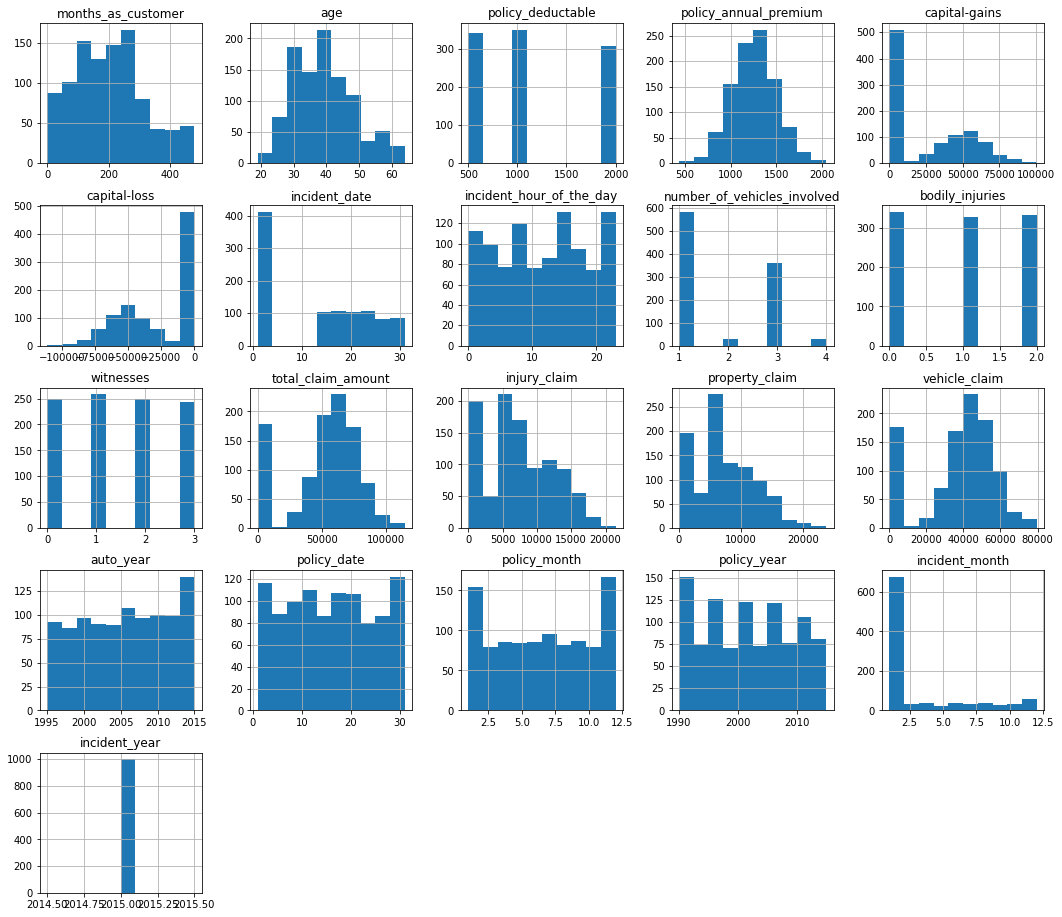

In [29]:
df.hist(figsize=(18,16))

#### Univariate Analysis

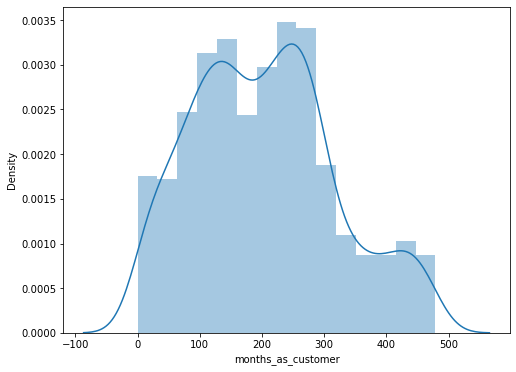

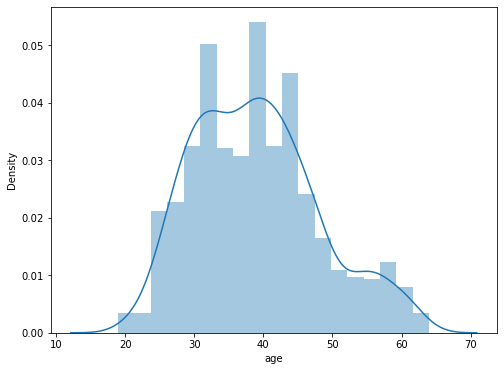

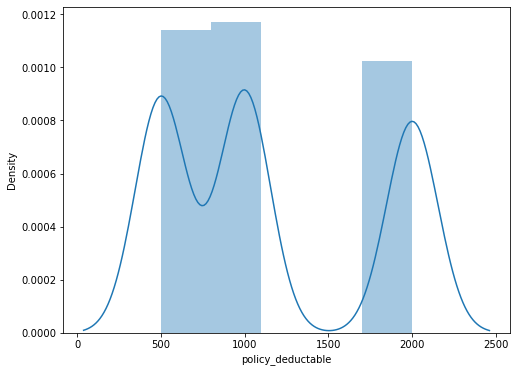

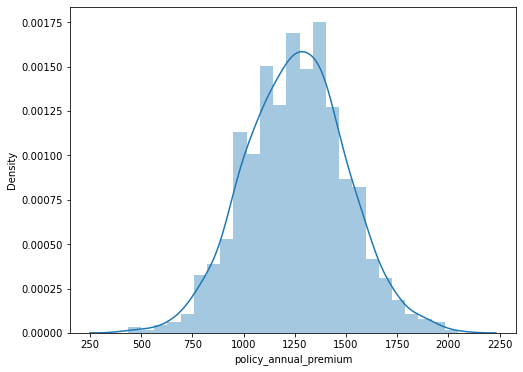

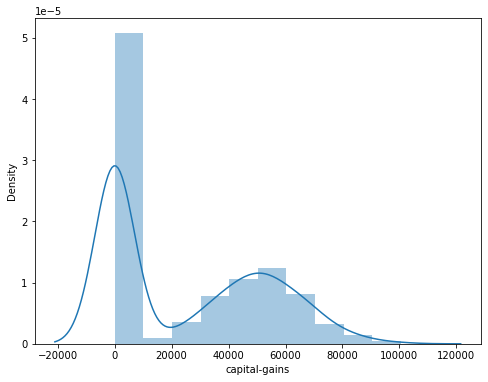

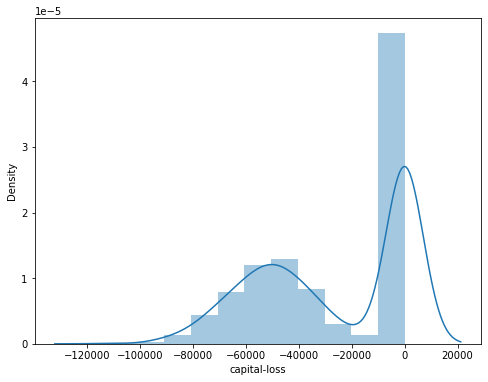

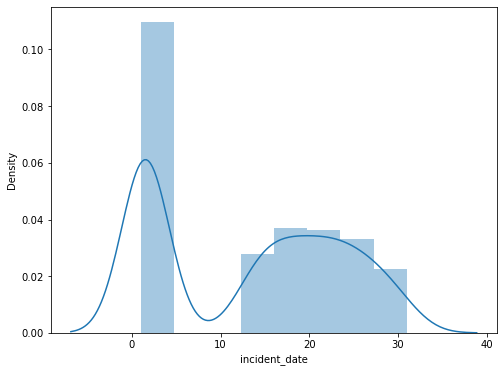

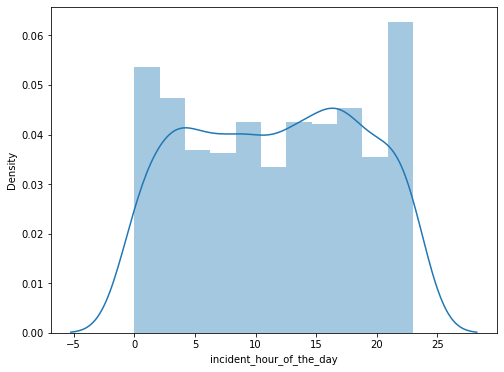

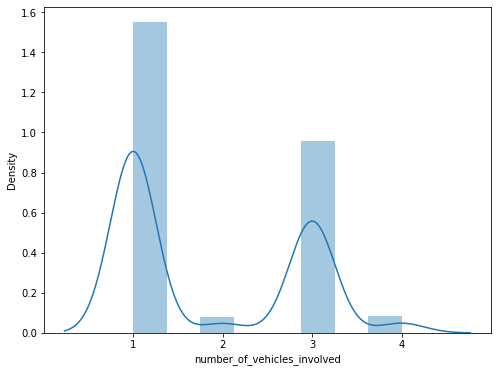

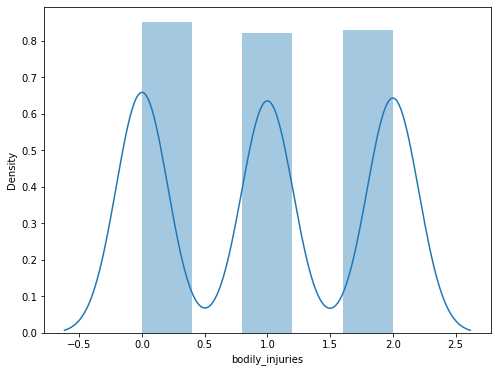

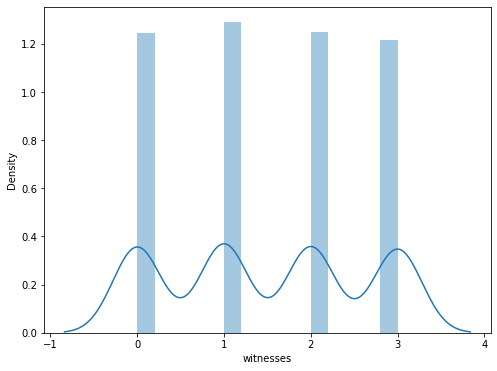

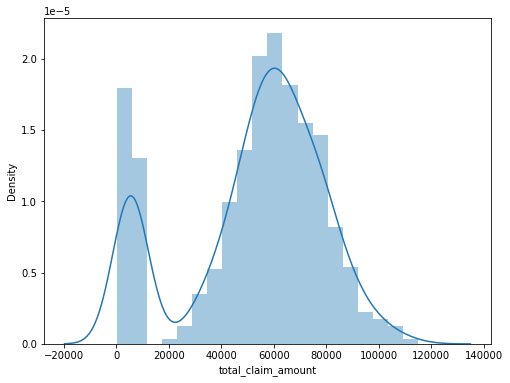

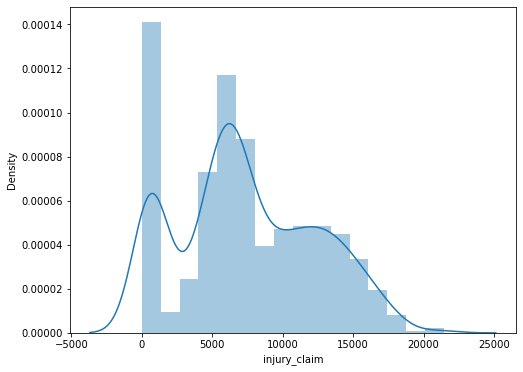

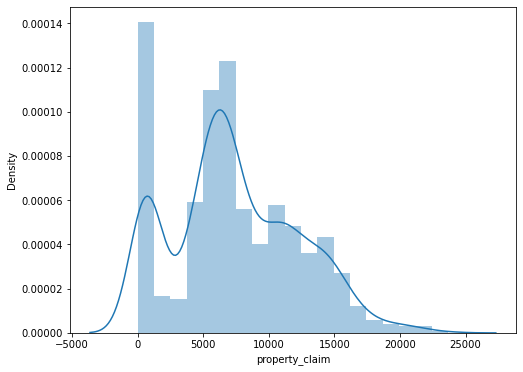

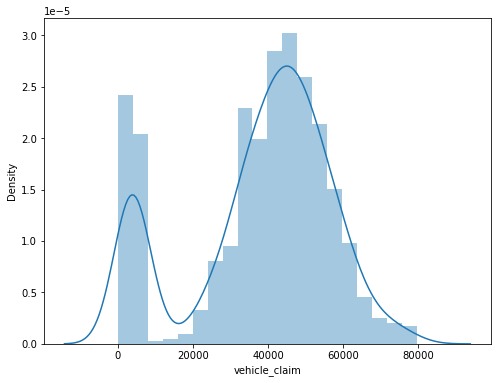

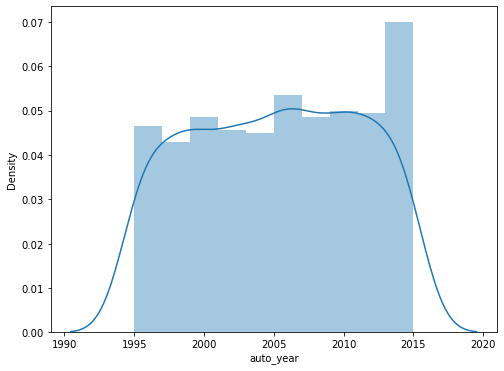

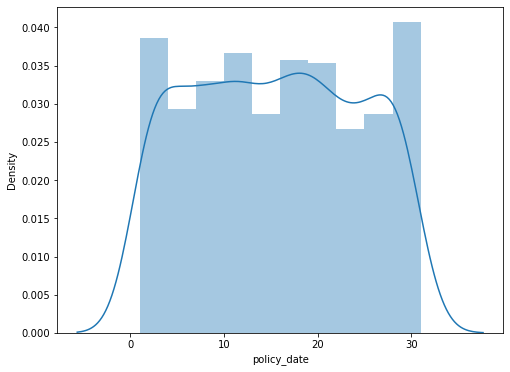

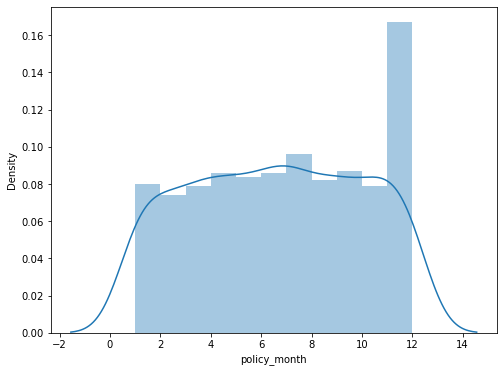

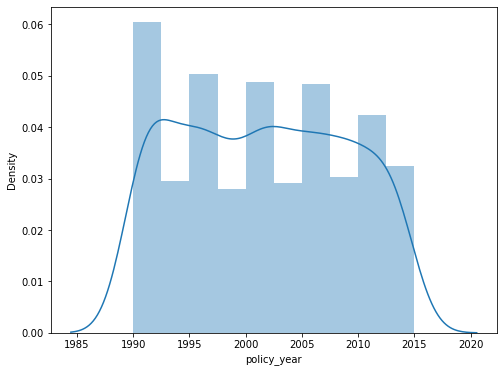

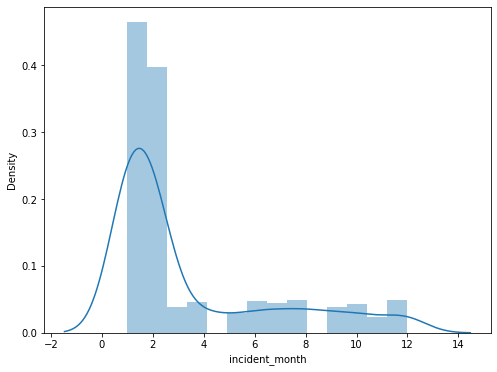

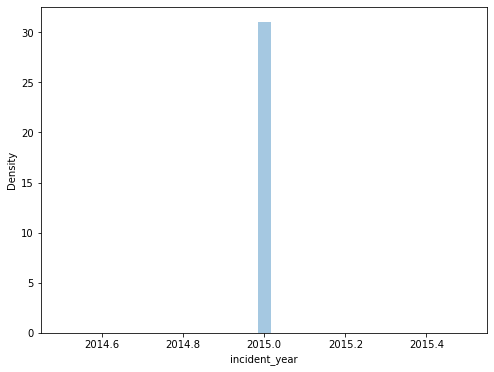

In [30]:
for col in continous_columns:
    plt.figure(figsize=(8,6))
    sns.distplot(df[col])
    plt.show()

All the data are from the year 2015, so lets drop the incident year.

In [31]:
df.drop(['incident_year'],axis=1,inplace=True)

In [32]:
continous_columns.remove('incident_year')

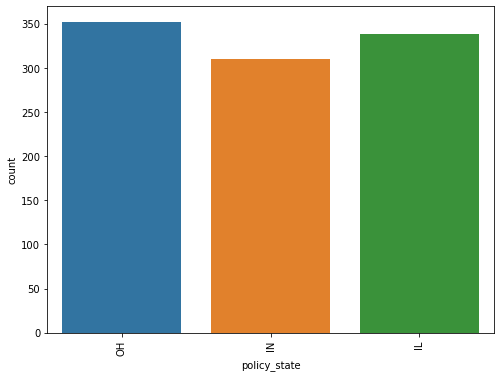

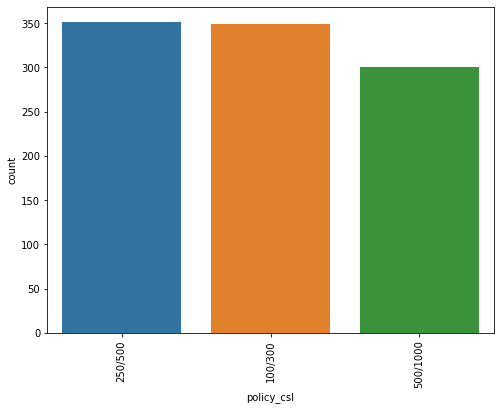

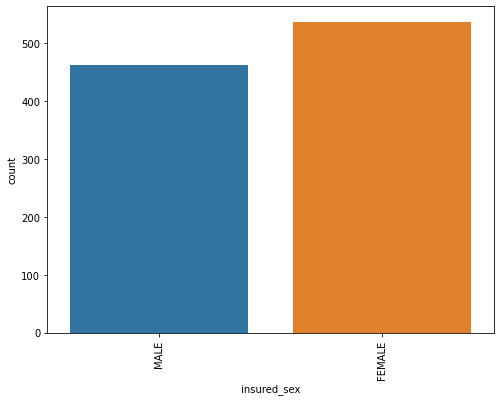

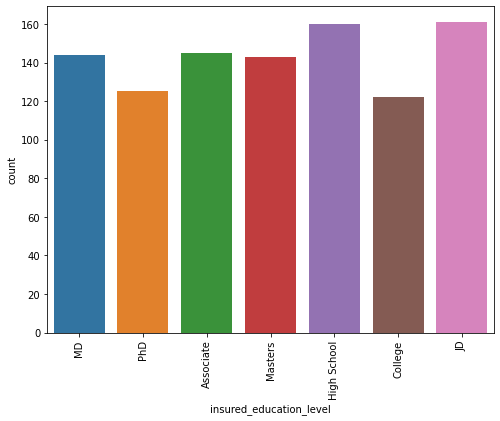

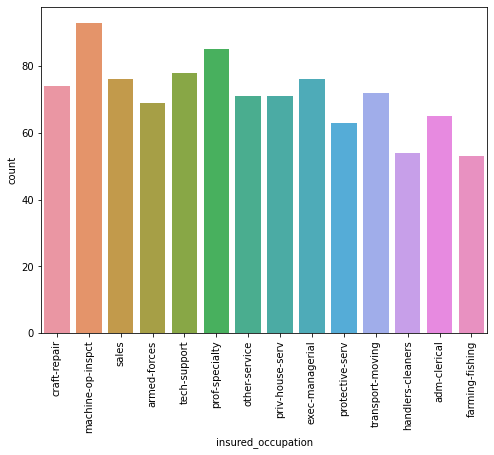

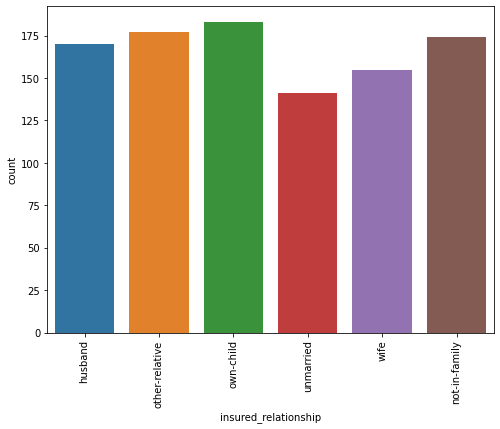

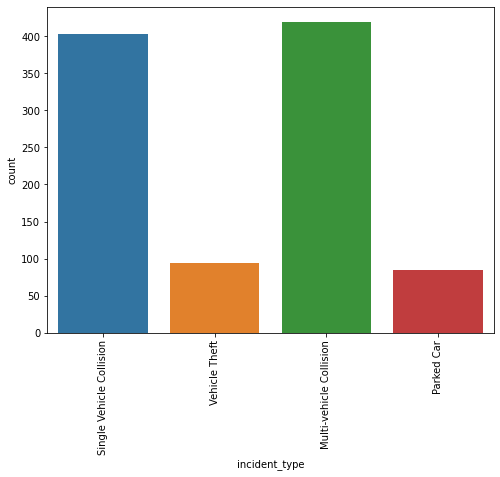

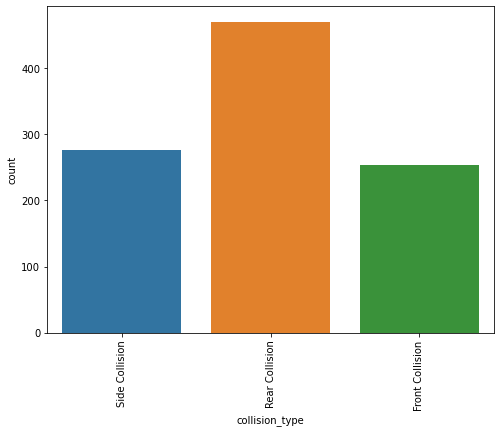

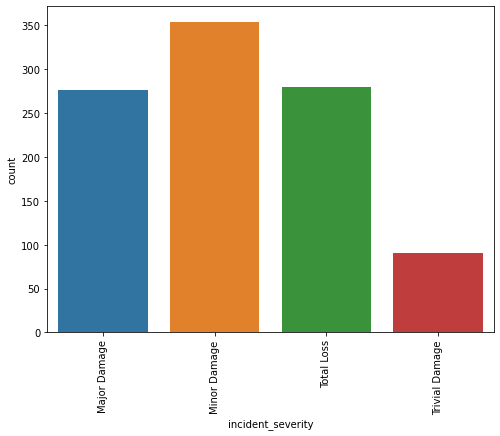

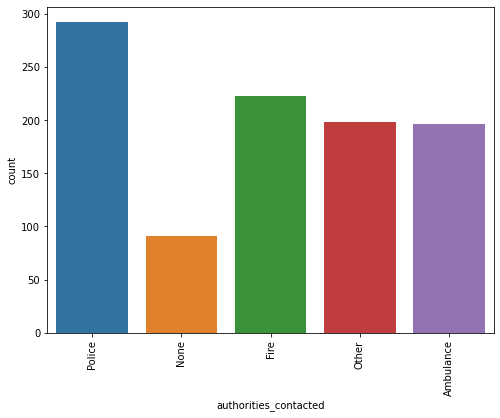

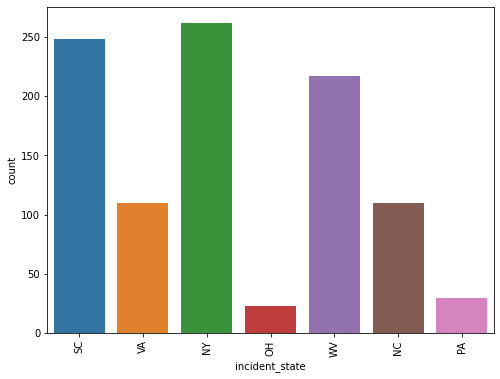

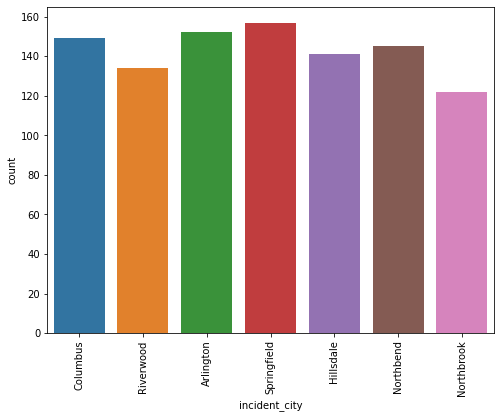

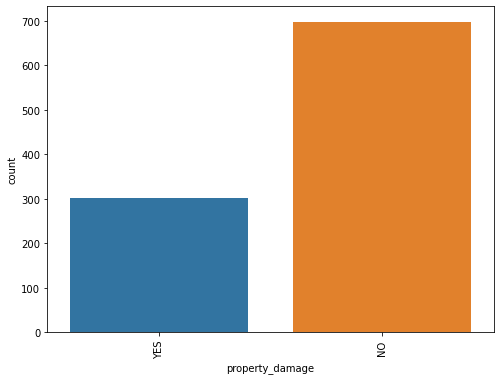

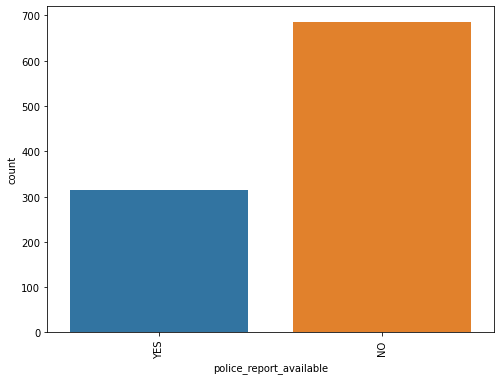

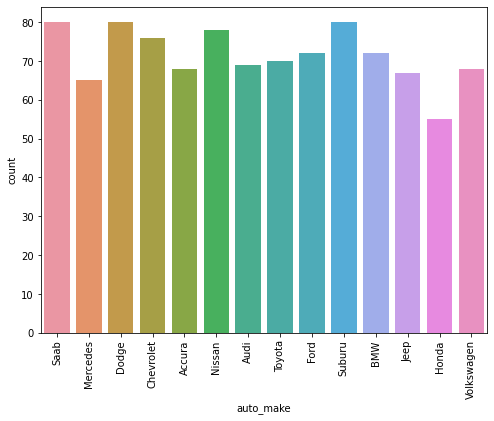

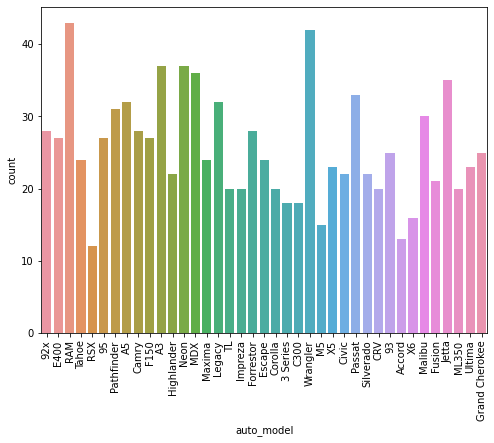

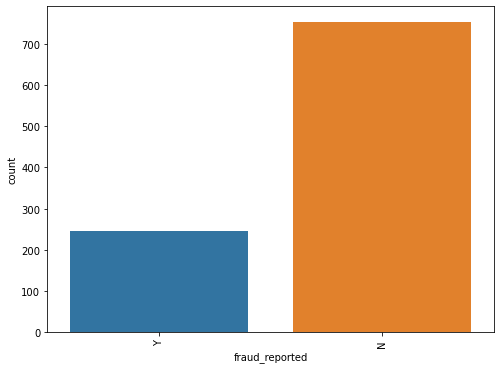

In [33]:
for col in categorical_columns:
    plt.figure(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.countplot(df[col])
    plt.show()

Observations from above plots:
1. We have more female policy holders than male.
2. Most of the policy holder's occupations are machine-op-inspect.
3. Most of the claims are with incident type multi-vehicle-collision and followed by Single vehicle collision.
4. Collision type is mostly Rear Collision.
5. Most of the incidents are with minor damage.
6. Most of the times Police authority has been contacted during the incident.
7. We have more claims claimed from the state NY(NewYork) and very less from Ohio.
8. Highest number of incidents occured in the city Springfield and followed by Columbus.
9. Most of the times, property damage is no.
10. Most of the times, police report is not available for the claim.
11. We have less fraud claims than true claims.


#### Bivariate Analysis

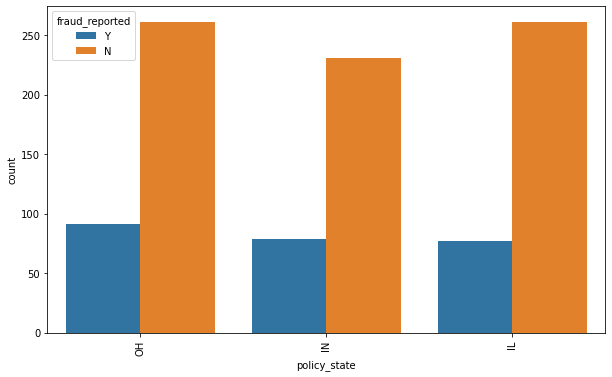

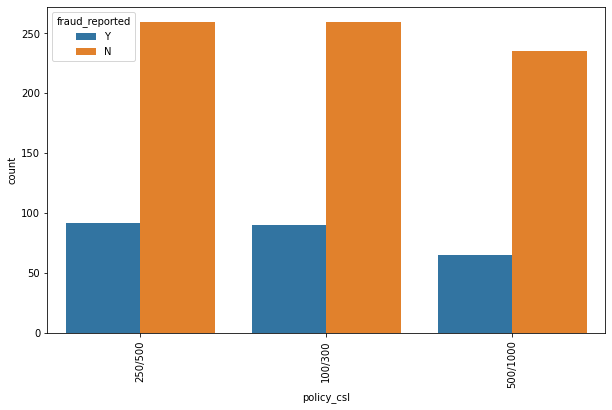

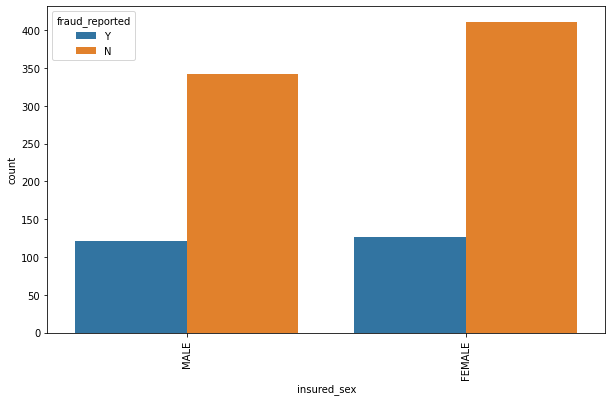

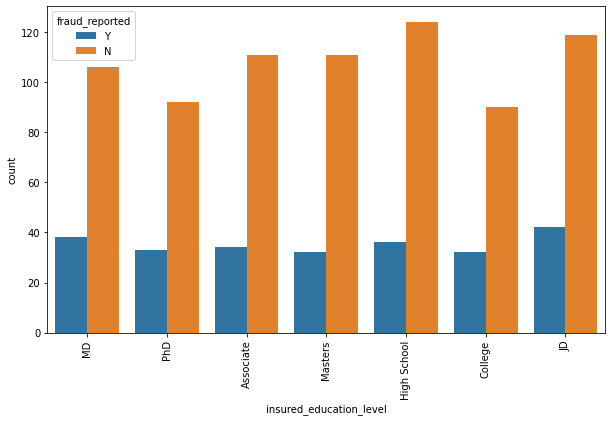

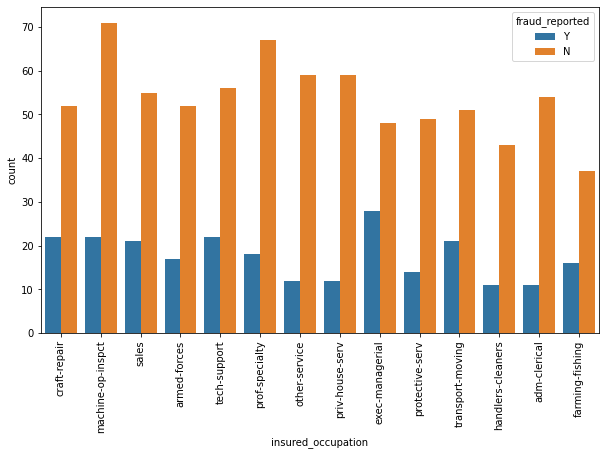

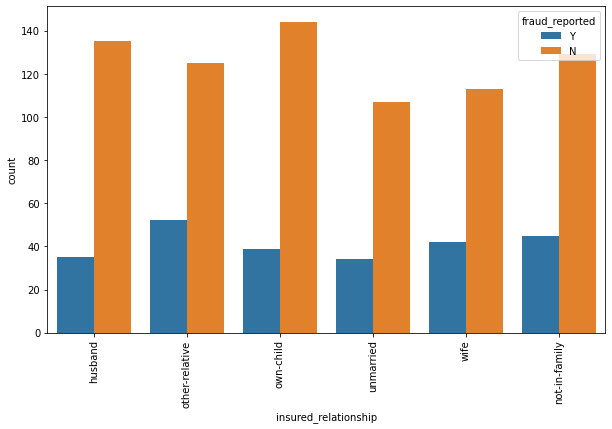

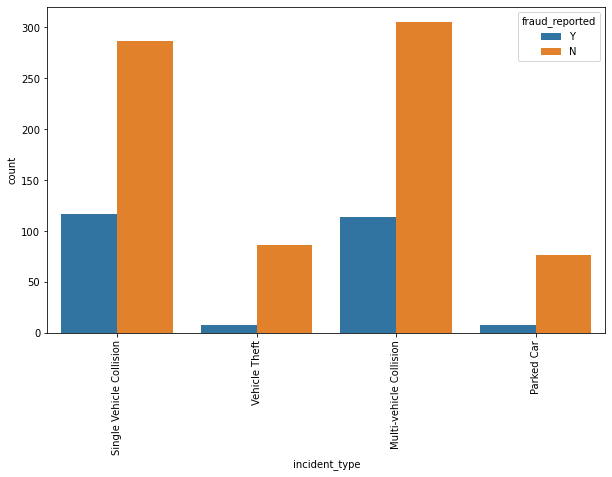

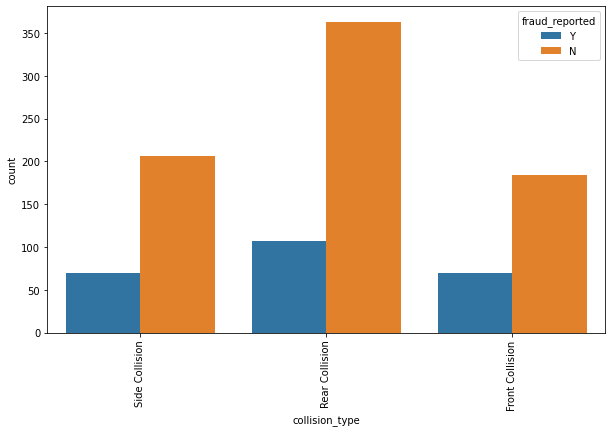

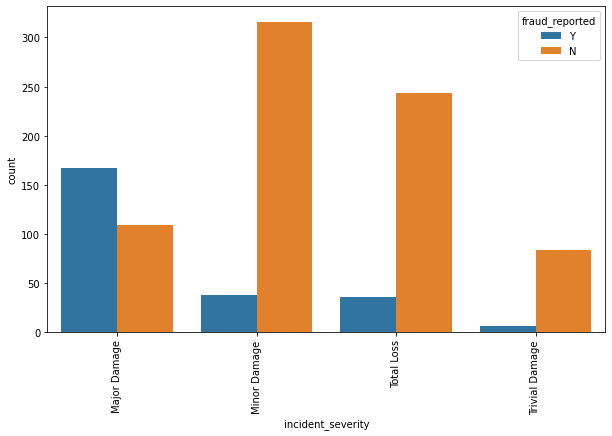

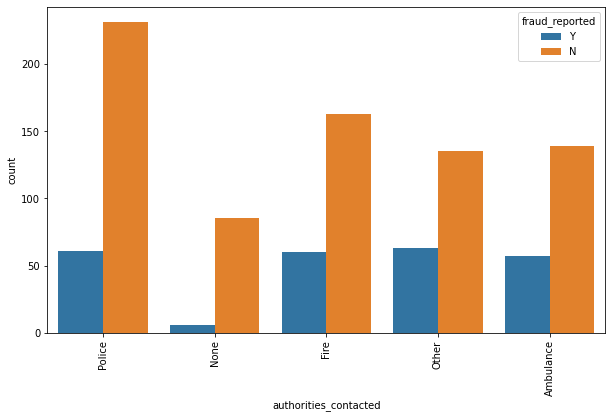

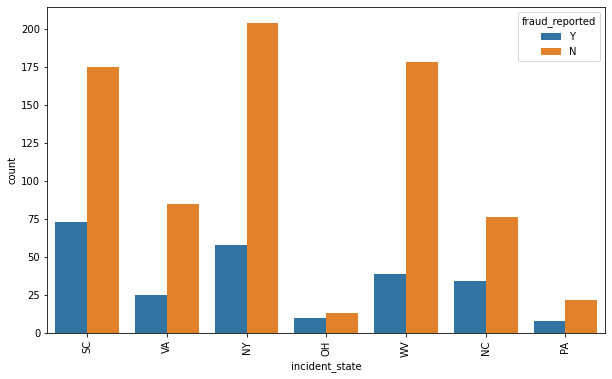

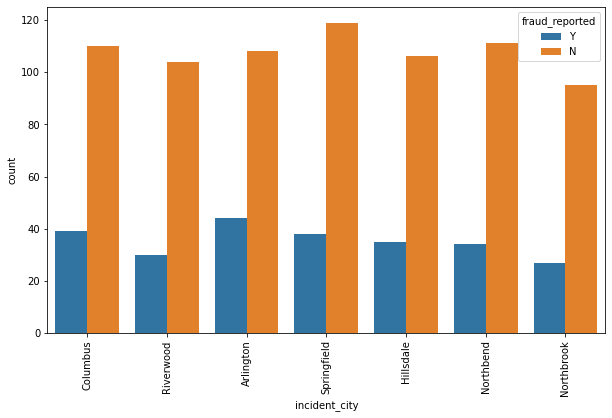

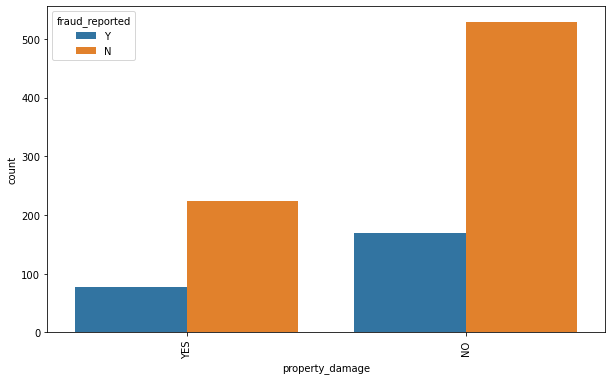

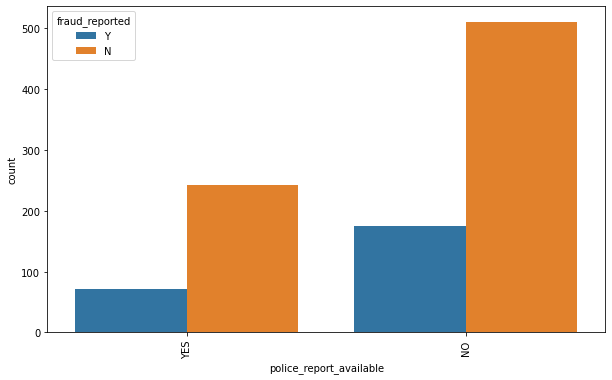

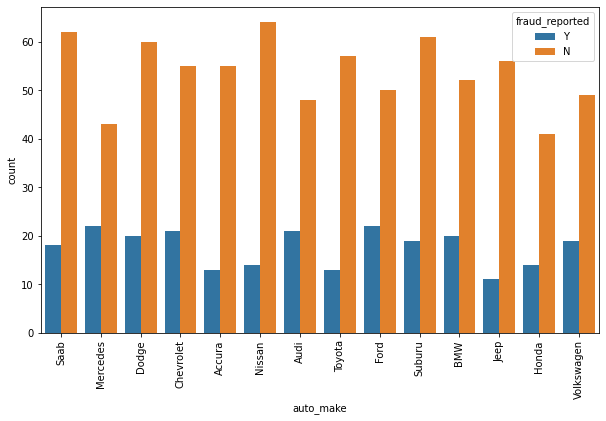

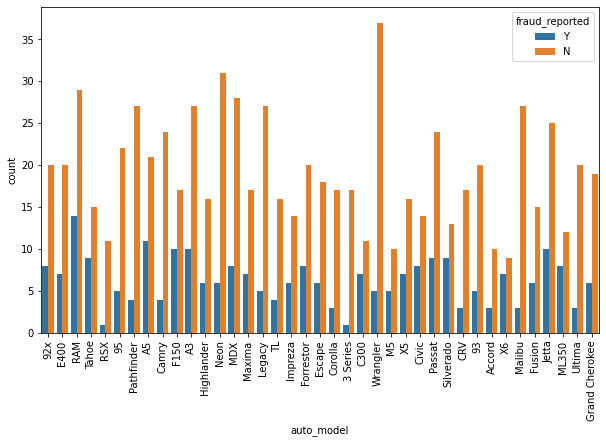

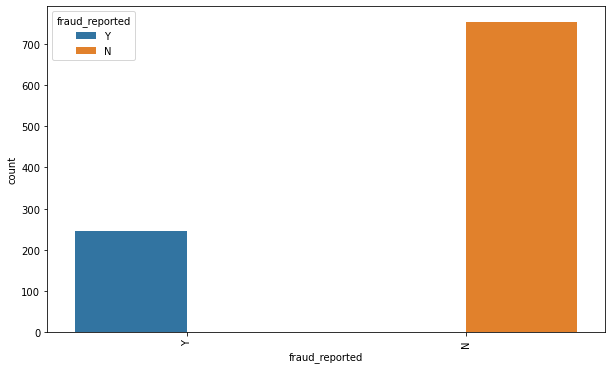

In [34]:
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    sns.countplot(df[col],hue=df['fraud_reported'])
    plt.show()

Observations from above plots:
1. We have almost more or less same level of fraud claims in all the states of insurance company.
2. We can see more or less equal amount of fraud claims from both the genders.
3. Fraud claims rate is slight high when the insurer education is JD.
4. Fraud claims rate is high when the insurer occupation is exec-managerial.
5. When the insured relationship is other relative, then the fraud claim rate is slightly higher.
6. When the incident type is vehicle theft and parked car, most of the times its a true claim.
7. When collision type is Rear collision, fraud claims rate is high.
8. When the incident seviority is majory damage, then most of the times its a fraud claim.
9. When the authorities contacted is none, then mostly it will be a true claim.
10. In the incident state is SC(South Carolina) most of the times its fraud claim.

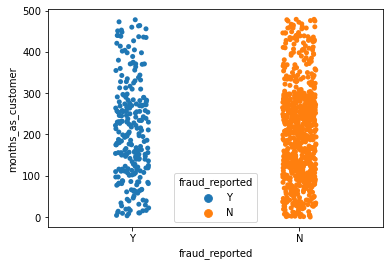

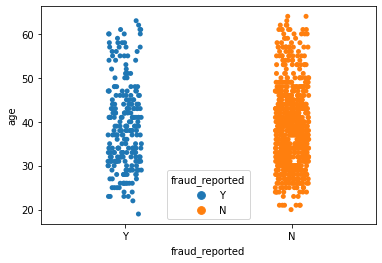

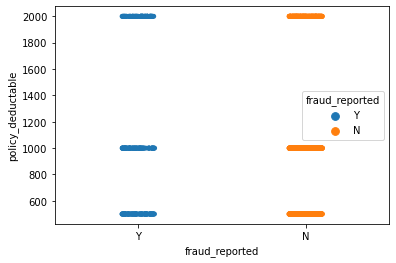

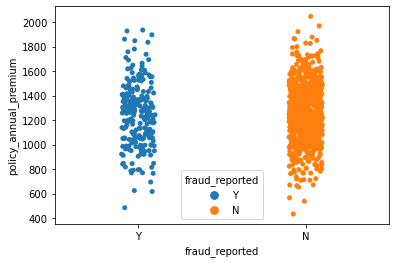

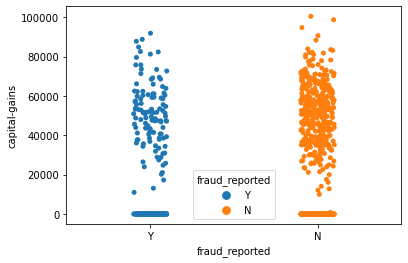

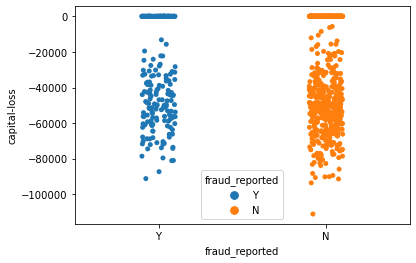

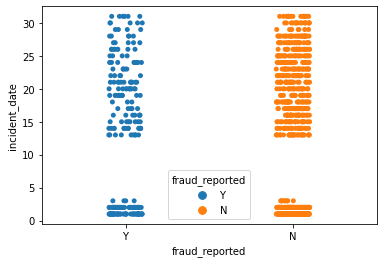

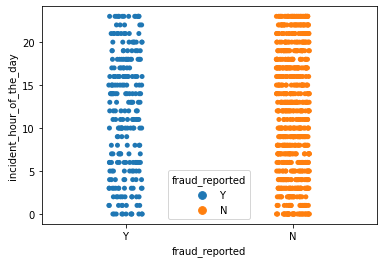

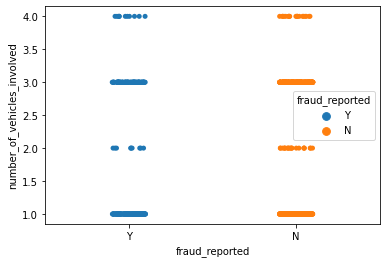

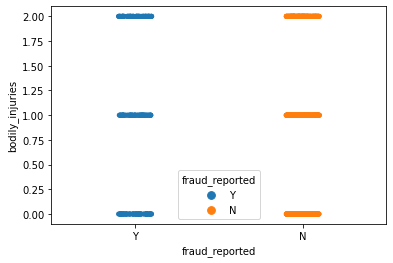

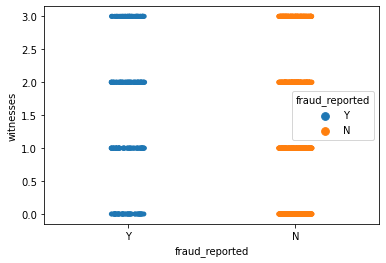

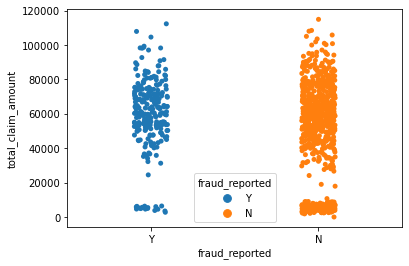

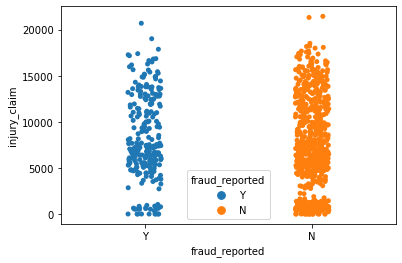

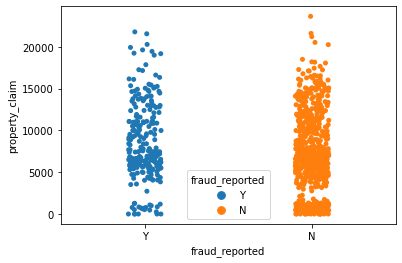

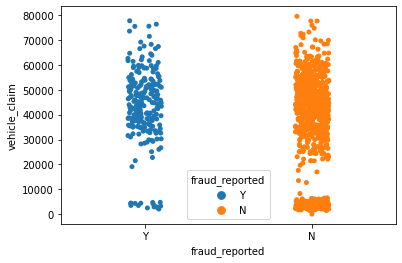

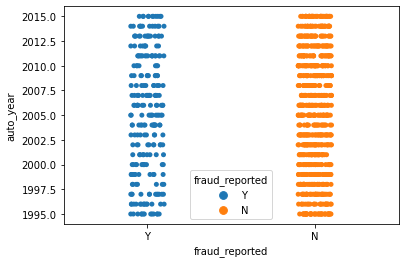

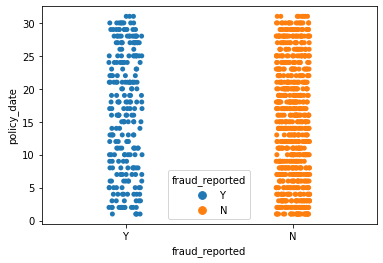

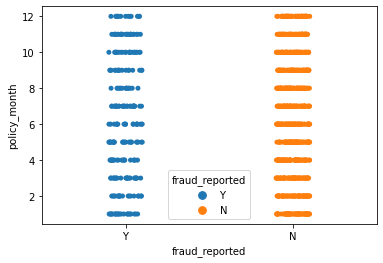

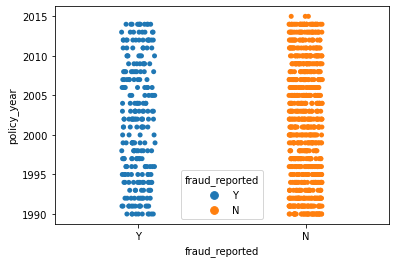

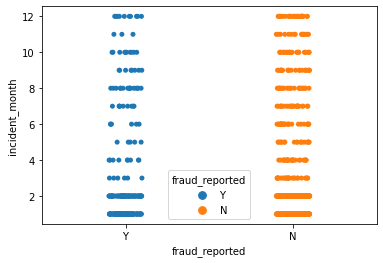

In [35]:
for col in continous_columns:
    sns.stripplot(y=col, x='fraud_reported',hue='fraud_reported',data=df)
    plt.show()

We could not see much relationship between the conitnous values and the target variable.

### Outlier Removal

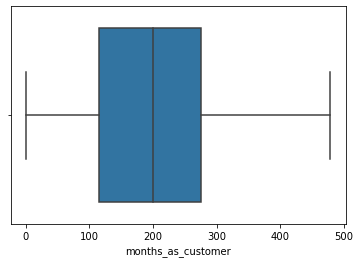

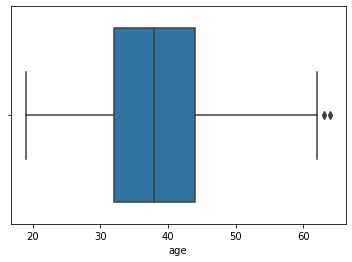

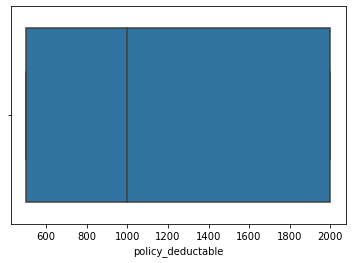

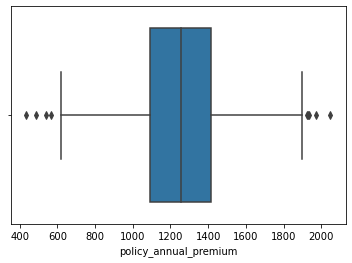

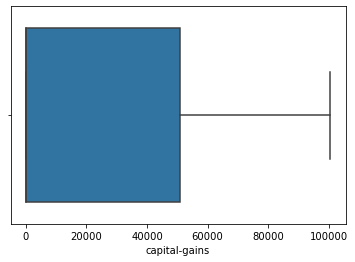

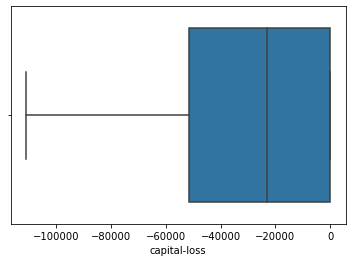

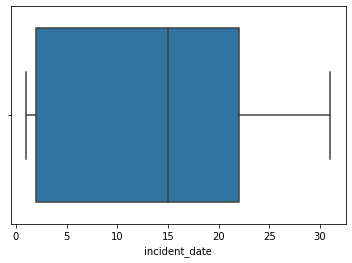

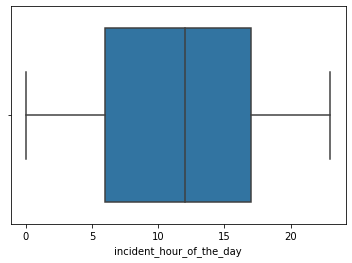

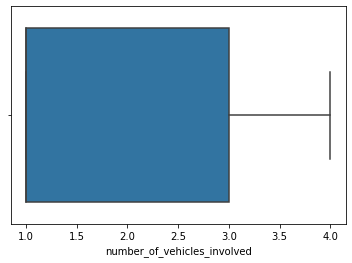

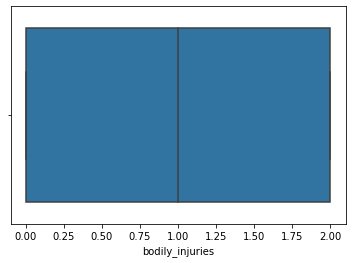

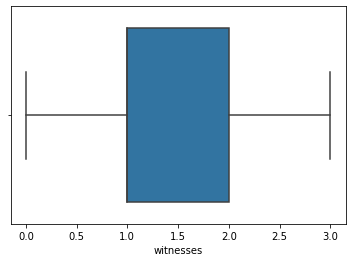

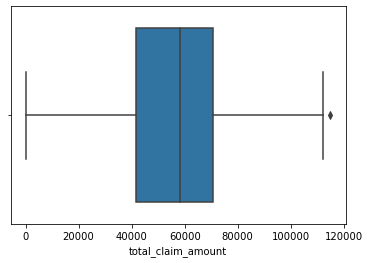

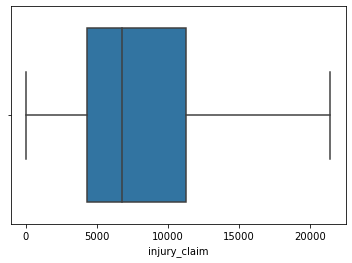

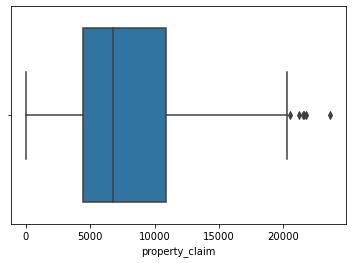

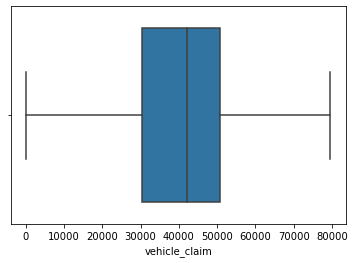

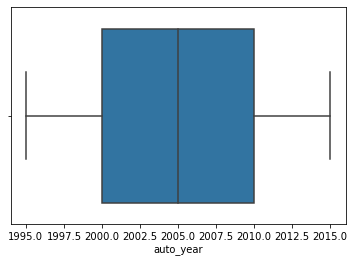

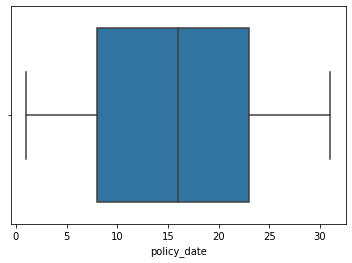

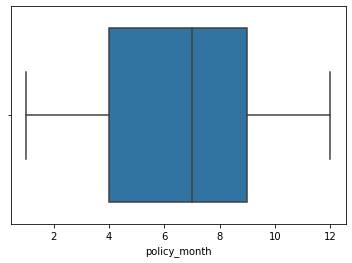

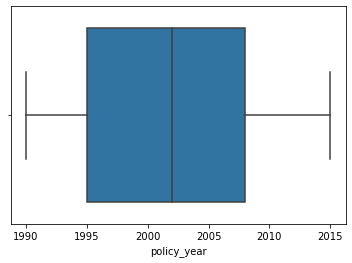

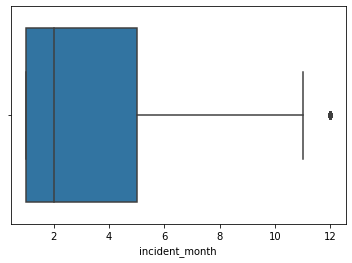

In [36]:
for col in continous_columns:
    sns.boxplot(df[col])
    plt.show()

We have outliers in 'age','policy_annual_premium','total_claim_amount','property_claim','incident_month'

In [37]:
outliers_features=['age','policy_annual_premium','total_claim_amount','property_claim','incident_month']

In [38]:
from scipy.stats import zscore

In [39]:
score=zscore(df[outliers_features])
filters=(score<3).all(axis=1)
new_df=df[filters]
print(df.shape,new_df.shape)

(1000, 37) (998, 37)


##### Data loss

In [40]:
loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
loss

0.2

We lost 0.2% of data as part of outlier removal process.

### Checking Data Skewness

In [41]:
new_df.skew().sort_values()

vehicle_claim                 -0.618319
total_claim_amount            -0.592664
capital-loss                  -0.392142
auto_year                     -0.051252
incident_hour_of_the_day      -0.035818
policy_month                  -0.031215
policy_annual_premium         -0.020906
bodily_injuries                0.014800
witnesses                      0.022850
policy_date                    0.027862
incident_date                  0.055435
policy_year                    0.056119
injury_claim                   0.266995
property_claim                 0.355348
months_as_customer             0.362596
policy_deductable              0.475562
age                            0.476782
capital-gains                  0.479662
number_of_vehicles_involved    0.499351
incident_month                 1.380003
dtype: float64

In [42]:
skewed_features=['vehicle_claim','total_claim_amount','incident_month']

In [43]:
from sklearn.preprocessing import PowerTransformer
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])
print(new_df.skew().sort_values())

vehicle_claim                 -0.521865
total_claim_amount            -0.509809
capital-loss                  -0.392142
auto_year                     -0.051252
incident_hour_of_the_day      -0.035818
policy_month                  -0.031215
policy_annual_premium         -0.020906
bodily_injuries                0.014800
witnesses                      0.022850
policy_date                    0.027862
incident_date                  0.055435
policy_year                    0.056119
injury_claim                   0.266995
incident_month                 0.306268
property_claim                 0.355348
months_as_customer             0.362596
policy_deductable              0.475562
age                            0.476782
capital-gains                  0.479662
number_of_vehicles_involved    0.499351
dtype: float64


We removed the data skewness as much as possible.

### Encoding non-numeric features

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
for i in categorical_columns:
    new_df[i]=LabelEncoder().fit_transform(new_df[i])

### Chekcing MultiColienearity

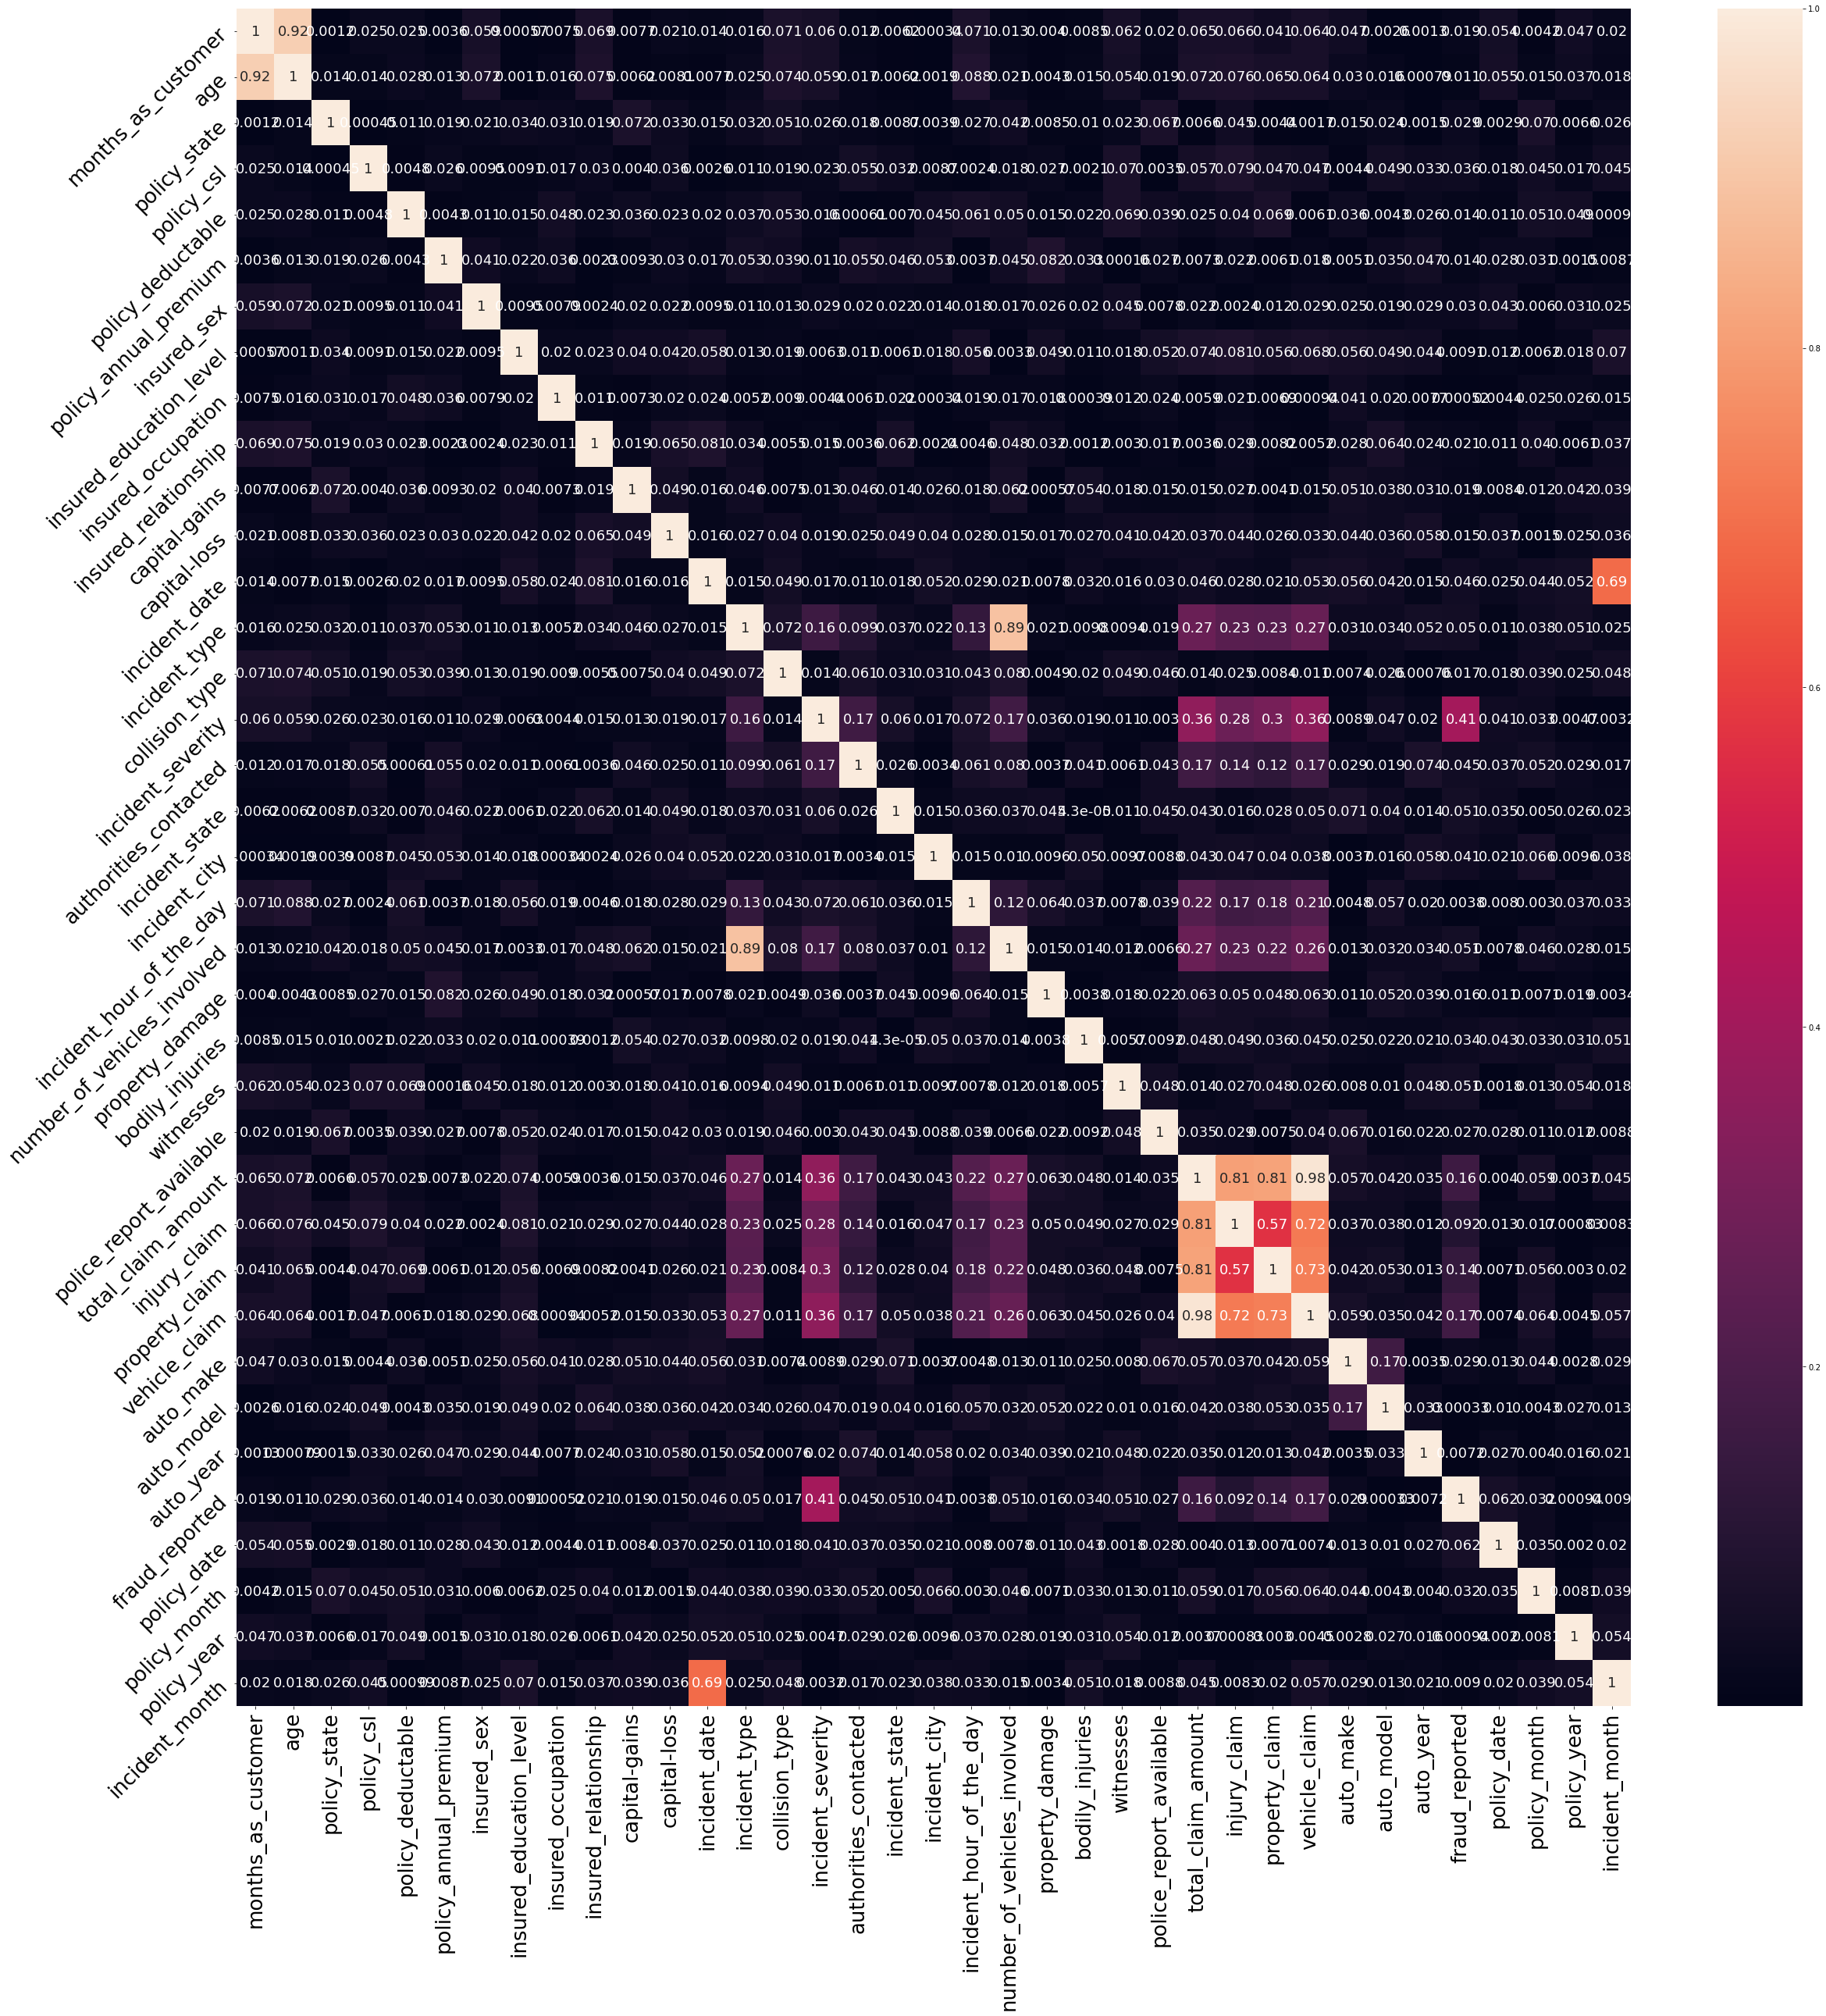

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(new_df.corr().abs(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=26,rotation=90)
plt.yticks(fontsize=26,rotation=45)
plt.show()

Observations from above plot:
1. we can see strong relationship between total_claim_amount and vehicle_claim.
2. Age and number of months as customer are 92% related to each other.
3. We will handle multi colinearity problem using VIF.

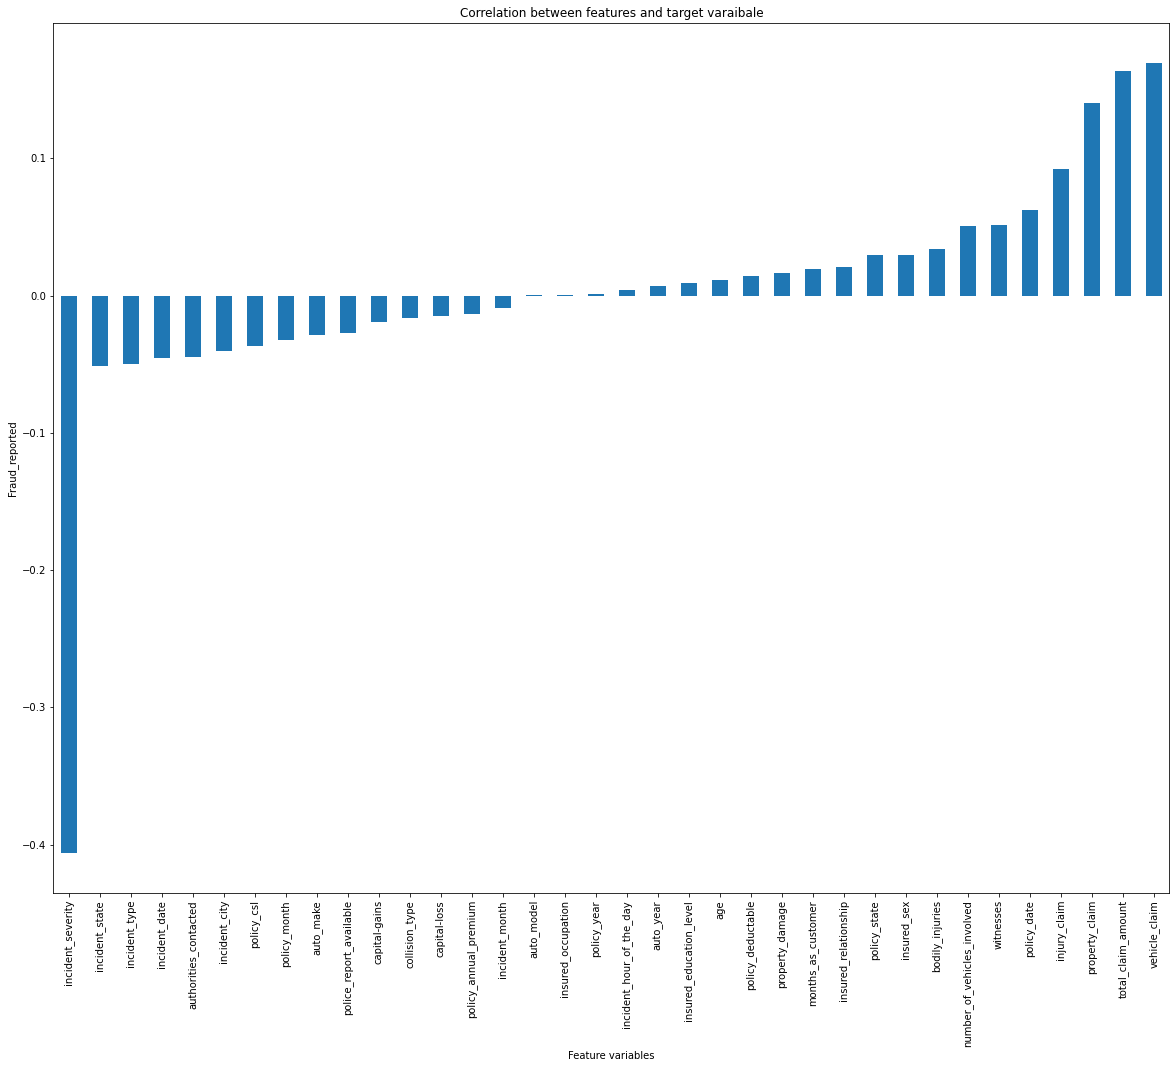

In [47]:
plt.figure(figsize=(20,16))
new_df.corr()['fraud_reported'].sort_values().drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Fraud_reported')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

Observations from the above plot:
1. We could see auto_model,insured_occupation and policy_year has very very less correlation with the target variable.

## Model Buiding 

In [48]:
X=new_df.drop(['fraud_reported'],axis=1)
y=new_df['fraud_reported']

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

#### Checking multi colinearity using VIF

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
25,44685.483563,total_claim_amount
28,22253.935708,vehicle_claim
26,1644.124490,injury_claim
27,1596.550068,property_claim
1,6.862059,age
0,6.843894,months_as_customer
13,5.123741,incident_type
20,5.100968,number_of_vehicles_involved
35,1.977302,incident_month
12,1.967649,incident_date


In [52]:
X_sc.drop(['total_claim_amount'],axis=1,inplace=True)

In [53]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
1,6.861979,age
0,6.842354,months_as_customer
13,5.113896,incident_type
20,5.088385,number_of_vehicles_involved
27,3.350590,vehicle_claim
26,2.256075,property_claim
25,2.174012,injury_claim
34,1.971655,incident_month
12,1.966391,incident_date
15,1.193809,incident_severity


Multicolinearity problem has been removed.

In [54]:
X_sc.shape

(998, 35)

In [55]:
X_sc=StandardScaler().fit_transform(X_sc)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve
import xgboost as xgb

#### Finding best random state

In [57]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.828 Best RS:  118


##### Splitting the train test set using best Random state found

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=118)

In [59]:
print(X_train.shape,y_train.shape)

(748, 35) (748,)


In [60]:
y_train.value_counts()

0    556
1    192
Name: fraud_reported, dtype: int64

We have imbalance data. Lets apply SMOTE to balance the data.

##### Applying SMOTE balancing technique

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (748, 35) (748,)
Training set size after applying SMOTE: (1112, 35) (1112,)


### Building base models - Model selection

In [63]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svc=SVC()
xgb_clf=xgb.XGBClassifier()

In [64]:
models=[lr,rf_clf,gb_clf,dt_clf,ab_clf,knn_clf,svc,xgb_clf]

In [65]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')

Metrics for  LogisticRegression()
Accuracy score:  0.728
ROC AUC Score:  0.7277389277389278
Confusion Matrix: 
 [[142  53]
 [ 15  40]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       195
           1       0.43      0.73      0.54        55

    accuracy                           0.73       250
   macro avg       0.67      0.73      0.67       250
weighted avg       0.80      0.73      0.75       250
 

Metrics for  RandomForestClassifier()
Accuracy score:  0.836
ROC AUC Score:  0.7121212121212122
Confusion Matrix: 
 [[182  13]
 [ 28  27]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       195
           1       0.68      0.49      0.57        55

    accuracy                           0.84       250
   macro avg       0.77      0.71      0.73       250
weighted avg       0.82      0.84      0.83       250
 

Metrics for  Gra

### Cross Validation

In [66]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7074221105527638
For Model  RandomForestClassifier()
Mean Accuracy:  0.7886381909547738
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.7966482412060302
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7013919597989948
For Model  AdaBoostClassifier()
Mean Accuracy:  0.7545778894472361
For Model  KNeighborsClassifier()
Mean Accuracy:  0.47592964824120604
For Model  SVC()
Mean Accuracy:  0.747532663316583
For Model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, 

### Plot ROC AUC Curve

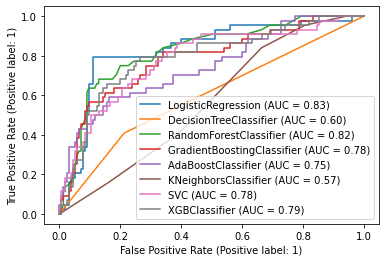

In [67]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(svc,X_test,y_test,ax=display.ax_)
plot_roc_curve(xgb_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

##### Based on cross validation score and AUC score RandomForestClassifier works well for our data set.

### Final Model - RandomForestClassifier

##### Hyper parameter tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [74]:
param={'criterion':['gini','entropy'],
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=130)
0.8706863814487134


##### Finding best Random state

In [76]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.949748743718593 Best RS:  7
0.949748743718593
0.9107771260997067
[[152   3]
 [  7  37]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       155
           1       0.93      0.84      0.88        44

    accuracy                           0.95       199
   macro avg       0.94      0.91      0.92       199
weighted avg       0.95      0.95      0.95       199



In [79]:
final_model=RandomForestClassifier(criterion='entropy', max_features='log2',n_estimators=130,random_state=7)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.949748743718593
ROC AUC Score:  0.9107771260997067
Confusion Matrix: 
 [[152   3]
 [  7  37]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       155
           1       0.93      0.84      0.88        44

    accuracy                           0.95       199
   macro avg       0.94      0.91      0.92       199
weighted avg       0.95      0.95      0.95       199



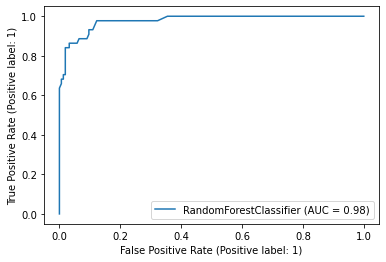

In [80]:
plot_roc_curve(final_model,X_test,y_test)
plt.show()

### We able to build a final model with 95% of accuracy and 98% of AUC coverage.

### Model Saving

In [81]:
import pickle

In [82]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/InsuranceClaimFraudPrediction.pkl','wb'))

In [83]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/InsuranceClaimFraudPrediction.pkl','rb'))

In [84]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
194,0,0
195,0,0
196,0,0
197,0,0
